<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#关系数据库存储-MySQL为例" data-toc-modified-id="关系数据库存储-MySQL为例-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>关系数据库存储-MySQL为例</a></span><ul class="toc-item"><li><span><a href="#关系数据库介绍" data-toc-modified-id="关系数据库介绍-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>关系数据库介绍</a></span></li></ul></li><li><span><a href="#Pymysql-安装" data-toc-modified-id="Pymysql-安装-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pymysql 安装</a></span></li><li><span><a href="#连接数据库" data-toc-modified-id="连接数据库-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>连接数据库</a></span></li><li><span><a href="#建立游标,执行sql" data-toc-modified-id="建立游标,执行sql-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>建立游标,执行sql</a></span></li><li><span><a href="#一次性插入多条数据" data-toc-modified-id="一次性插入多条数据-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>一次性插入多条数据</a></span></li><li><span><a href="#执行事务" data-toc-modified-id="执行事务-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>执行事务</a></span></li><li><span><a href="#查询数据" data-toc-modified-id="查询数据-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>查询数据</a></span></li><li><span><a href="#练习题" data-toc-modified-id="练习题-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>练习题</a></span></li><li><span><a href="#存一个数据" data-toc-modified-id="存一个数据-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>存一个数据</a></span></li></ul></div>

## 关系数据库存储-MySQL为例

### 关系数据库介绍

假设你已经（或者有能力）获取大量数据（通过爬取），那么选择何种方式去存储数据非常重要

一般而言就爬虫问题，我们可以选择：

1. 文本文件的形式保存（比如csv）
2. 数据库

第一种

- 优势：方便，随时使用，不需要第三方的支持
- 劣势：健壮性差，扩展性差

第二种

- 优势：良好的扩展性，使用广泛
- 劣势：对技术有一定要求

## Pymysql 安装

Python配合MySQL,我们使用pymysql进行操作

MySQL和Python的连接库：

- Python3.x: pymysql

利用 pip安装

pip install pymysql -i https://pypi.tuna.tsinghua.edu.cn/simple

In [ ]:
# 直接在jupyter安装

In [1]:
!pip install pymysql -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


利用conda安装

conda install pymysql

## 连接数据库

In [1]:
import pymysql

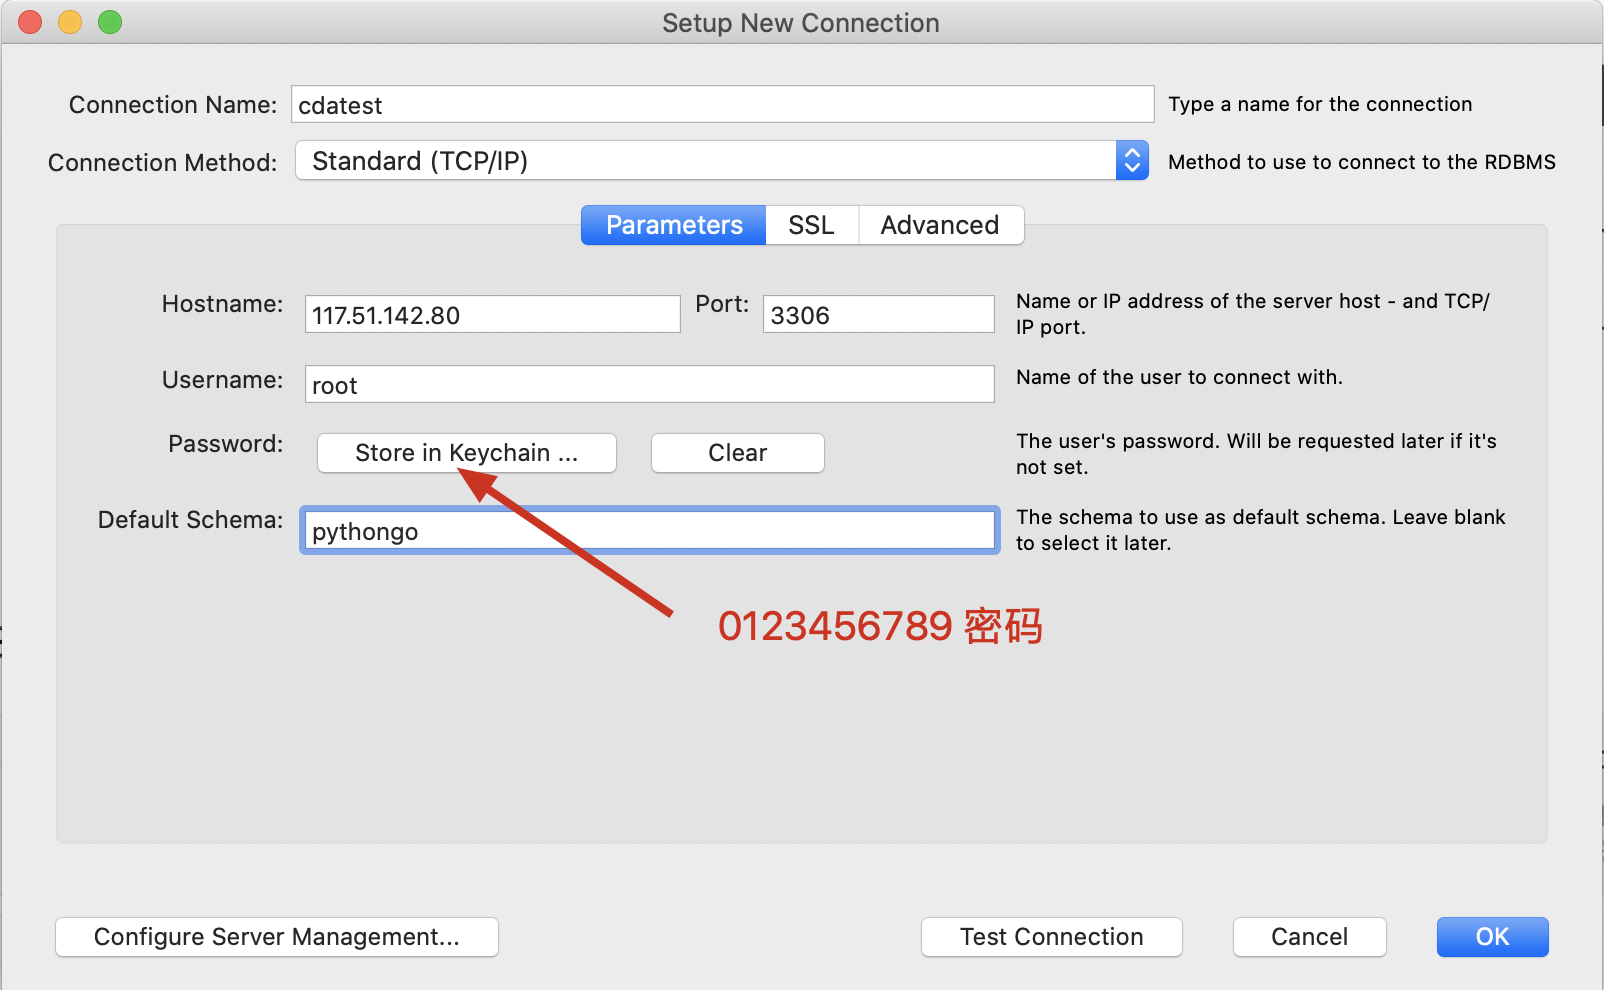

In [5]:
# 重新连接新的数据库
connect = pymysql.connect(host = '117.51.150.152',
                         port=3306,
                         user = 'root',
                         password= '0123456789',
                         database = 'pythongo',
                         charset = 'utf8')

In [ ]:
# 连接你自己的数据库
connect = pymysql.connect(host = '127.0.0.1',
                         port=3306,
                         user = 'root',
                         password= '0123456789',
                         database = 'pythongo',
                         charset = 'utf8')

In [4]:
# 建立一个光标
cursor =connect.cursor()

In [6]:
connect

In [7]:
type(connect)

pymysql.connections.Connection

## 建立游标,执行sql

In [6]:
# 建立一个光标
cursor =connect.cursor()

In [7]:
name = 'yangyue_0329'

In [8]:
# sql创建表格的代码
sql = """create table {} (id varchar(10), name varchar(10),
age int, gender  nvarchar(10))""".format(name)
sql

'create table yangyue_0329 (id varchar(10), name varchar(10),\nage int, gender  nvarchar(10))'

In [9]:
# 执行sql语句
cursor.execute(sql)

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/pymysql/cursors.py:170: Warning: (3720, 'NATIONAL/NCHAR/NVARCHAR implies the character set UTF8MB3, which will be replaced by UTF8MB4 in a future release. Please consider using CHAR(x) CHARACTER SET UTF8MB4 in order to be unambiguous.')
  result = self._query(query)


0

In [6]:
sql = "create database cda_test2 character set utf8 collate utf8_general_ci; "

In [7]:
# 创建数据库
cursor.execute(sql)

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/pymysql/cursors.py:170: Warning: (3719, "'utf8' is currently an alias for the character set UTF8MB3, but will be an alias for UTF8MB4 in a future release. Please consider using UTF8MB4 in order to be unambiguous.")
  result = self._query(query)
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/pymysql/cursors.py:170: Warning: (3778, "'utf8_general_ci' is a collation of the deprecated character set UTF8MB3. Please consider using UTF8MB4 with an appropriate collation instead.")
  result = self._query(query)


1

In [10]:
# 创建表格
sql2 = "create table Student(Sid varchar(10),Sname nvarchar(10),Sage datetime,Ssex nvarchar(10))"

In [11]:
cursor.execute(sql2)

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/pymysql/cursors.py:170: Warning: (3720, 'NATIONAL/NCHAR/NVARCHAR implies the character set UTF8MB3, which will be replaced by UTF8MB4 in a future release. Please consider using CHAR(x) CHARACTER SET UTF8MB4 in order to be unambiguous.')
  result = self._query(query)


0

In [10]:
sql = """insert into {} values('001','杨悦','18','男')
""".format(name)

In [11]:
cursor.execute(sql)

1

In [12]:
# 插入数据特殊的地方: 需要提交
connect.commit()

## 一次性插入多条数据

In [14]:
# 一次插入多条数据
data = [('002','钱电' ,'32', '男'),
       ('003' , '孙风' , '28' , '男'),
       ('004' , '李云' , '19' , '女')]

In [15]:
data

[('002', '钱电', '32', '男'), ('003', '孙风', '28', '男'), ('004', '李云', '19', '女')]

In [ ]:
sql = """insert into yangyue_0329 values('001','杨悦','18','男')
"""

In [25]:
# 对每一条数据进行循环
for i in data:
    sql = """insert into yangyue_0329 values('{}','{}','{}','{}')""".format(*i)
    print(sql)
    cursor.execute(sql)
# 插入数据特殊的地方: 需要提交
connect.commit()

insert into yangyue_0329 values('002','钱电','32','男')
insert into yangyue_0329 values('003','孙风','28','男')
insert into yangyue_0329 values('004','李云','19','女')


In [24]:
# 格式化的语法
sql = "insert into yangyue_0329 values('{}','{}','{}','{}')".format(*('002', '钱电', '32', '男'))
sql

"insert into yangyue_0329 values('002','钱电','32','男')"

In [26]:
data

[('002', '钱电', '32', '男'), ('003', '孙风', '28', '男'), ('004', '李云', '19', '女')]

In [27]:
cursor.executemany("insert into 你的表名 values(%s, %s, %s, %s)" ,data)

3

In [28]:
# 插入操作必须在commit后才会生效
connect.commit()

In [14]:
cursor.executemany("""insert into Student values(%s, %s , %s , %s)""" , data)

3

In [15]:
# 插入操作必须在commit后才会生效
connect.commit()

## 执行事务

事务机制可以确保数据一致性。

事务应该具有4个属性：原子性、一致性、隔离性、持久性。这四个属性通常称为ACID特性。

- 原子性（atomicity）。一个事务是一个不可分割的工作单位，事务中包括的诸操作要么都做，要么都不做。
- 一致性（consistency）。事务必须是使数据库从一个一致性状态变到另一个一致性状态。一致性与原子性是密切相关的。
- 隔离性（isolation）。一个事务的执行不能被其他事务干扰。即一个事务内部的操作及使用的数据对并发的其他事务是隔离的，并发执行的各个事务之间不能互相干扰。
- 持久性（durability）。持续性也称永久性（permanence），指一个事务一旦提交，它对数据库中数据的改变就应该是永久性的。接下来的其他操作或故障不应该对其有任何影响。

In [ ]:
# 换一种方法插入数据也可以

In [29]:
data

[('002', '钱电', '32', '男'), ('003', '孙风', '28', '男'), ('004', '李云', '19', '女')]

In [31]:
data[1] = ('003','孙风','28a','男')

In [32]:
data

[('002', '钱电', '32', '男'), ('003', '孙风', '28a', '男'), ('004', '李云', '19', '女')]

In [35]:
# 对每一条数据进行循环
for i in data:
    sql = """insert into yangyue_0329 values('{}','{}','{}','{}')""".format(*i)
    print(sql)
    cursor.execute(sql)
    # 插入数据特殊的地方: 需要提交
    connect.commit()

insert into yangyue_0329 values('002','钱电','32','男')
insert into yangyue_0329 values('003','孙风','28a','男')


DataError: (1265, "Data truncated for column 'age' at row 1")

In [ ]:
try: # 尝试运行以下代码, 可能可以正常运行,可能报错
    xxxxxx
except: # 如果上面代码报错了, 就运行这块
    xxxxxx
finally: # 不管上面代码有没有报错,这个代码一定会被运行
    xxxxxx

In [39]:
data

[('002', '钱电', '32', '男'), ('003', '孙风', '28a', '男'), ('004', '李云', '19', '女')]

In [37]:
try:
    for i in data:
        sql = """insert into yangyue_0329 values('{}','{}','{}','{}')""".format(*i)
        print(sql)
        cursor.execute(sql)
    connect.commit() # 提交
except: # 万一上面报错了
    # 发生错误时回滚
    print('上面已经报错了')
    connect.rollback()
    


insert into yangyue_0329 values('002','钱电','32','男')
insert into yangyue_0329 values('003','孙风','28a','男')
上面已经报错了


In [38]:
connect.commit()

In [16]:
# 插入数据
sql3 = """insert into Student values('04' , N'李云' , '1990-08-06' , N'男')
insert into Student values('05' , N'周梅' , '1991-12-01' , N'女')
insert into Student values('06' , N'吴兰' , '1992-03-01' , N'女')
insert into Student values('07' , N'郑竹' , '1989-07-01' , N'女')
insert into Student values('08' , N'王菊' , '1990-01-20' , N'女')"""

In [17]:
for i in sql3.splitlines():
    cursor.execute(i)
try:
   # 执行sql语句
   connect.commit()
except:
   # 发生错误时回滚
   connect.rollback()

## 查询数据

In [43]:
sql = """
CREATE TABLE `Student2` (
  `Sid` varchar(10) DEFAULT NULL,
  `Sname` varchar(10) CHARACTER SET utf8 COLLATE utf8_general_ci DEFAULT NULL,
  `Sage` datetime DEFAULT NULL,
  `Ssex` varchar(10) CHARACTER SET utf8 COLLATE utf8_general_ci DEFAULT NULL
) ENGINE=InnoDB DEFAULT CHARSET=utf8;
"""

In [44]:
cursor.execute(sql)

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/pymysql/cursors.py:170: Warning: (3719, "'utf8' is currently an alias for the character set UTF8MB3, but will be an alias for UTF8MB4 in a future release. Please consider using UTF8MB4 in order to be unambiguous.")
  result = self._query(query)
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/pymysql/cursors.py:170: Warning: (3778, "'utf8_general_ci' is a collation of the deprecated character set UTF8MB3. Please consider using UTF8MB4 with an appropriate collation instead.")
  result = self._query(query)


0

In [45]:
data = [['01', '赵雷', '1990-01-01 00:00:00', '男'],
['02', '钱电', '1990-12-21 00:00:00', '男'],
['03', '孙风', '1990-05-20 00:00:00', '男'],
['04', '李云', '1990-08-06 00:00:00', '男'],
['04', '李云', '1990-08-06 00:00:00', '男'],
['05', '周梅', '1991-12-01 00:00:00', '女'],
['06', '吴兰', '1992-03-01 00:00:00', '女'],
['07', '郑竹', '1989-07-01 00:00:00', '女'],
['08', '王菊', '1990-01-20 00:00:00', '女']]

In [46]:
cursor.executemany("""insert into Student2 values(%s, %s , %s , %s)""" , data)
connect.commit()

In [56]:
# 定义查询语句然后执行
sql = 'select * from Student2'
cursor.execute(sql)

9

In [ ]:
cursor.fetchone # 提取一条
cursor.fetchall # 查询到的所有
cursor.fetchmany(5) #  提取查询到的前5条

In [55]:
cursor.fetchone()

('07', '郑竹', datetime.datetime(1989, 7, 1, 0, 0), '女')

In [57]:
# 查询到的全部数据
data = cursor.fetchall()
data

(('01', '赵雷', datetime.datetime(1990, 1, 1, 0, 0), '男'),
 ('02', '钱电', datetime.datetime(1990, 12, 21, 0, 0), '男'),
 ('03', '孙风', datetime.datetime(1990, 5, 20, 0, 0), '男'),
 ('04', '李云', datetime.datetime(1990, 8, 6, 0, 0), '男'),
 ('04', '李云', datetime.datetime(1990, 8, 6, 0, 0), '男'),
 ('05', '周梅', datetime.datetime(1991, 12, 1, 0, 0), '女'),
 ('06', '吴兰', datetime.datetime(1992, 3, 1, 0, 0), '女'),
 ('07', '郑竹', datetime.datetime(1989, 7, 1, 0, 0), '女'),
 ('08', '王菊', datetime.datetime(1990, 1, 20, 0, 0), '女'))

In [67]:
# 定义查询语句然后执行
sql = 'select * from Student2'
cursor.execute(sql)

9

In [64]:
cursor.fetchmany(3)

()

In [65]:
# 定义查询语句然后执行
sql = 'select * from Student2 where Ssex ="男"  '
cursor.execute(sql)

5

In [66]:
data = cursor.fetchall()
data

(('01', '赵雷', datetime.datetime(1990, 1, 1, 0, 0), '男'),
 ('02', '钱电', datetime.datetime(1990, 12, 21, 0, 0), '男'),
 ('03', '孙风', datetime.datetime(1990, 5, 20, 0, 0), '男'),
 ('04', '李云', datetime.datetime(1990, 8, 6, 0, 0), '男'),
 ('04', '李云', datetime.datetime(1990, 8, 6, 0, 0), '男'))

In [18]:
cursor.execute('select * from Student')

9

In [19]:
one = cursor.fetchone()
one

('01', '赵雷', datetime.datetime(1990, 1, 1, 0, 0), '男')

In [20]:
three = cursor.fetchmany(3)
three

(('02', '钱电', datetime.datetime(1990, 12, 21, 0, 0), '男'),
 ('03', '孙风', datetime.datetime(1990, 5, 20, 0, 0), '男'),
 ('04', '李云', datetime.datetime(1990, 8, 6, 0, 0), '男'))

In [21]:
last = cursor.fetchall()
last

(('04', '李云', datetime.datetime(1990, 8, 6, 0, 0), '男'),
 ('05', '周梅', datetime.datetime(1991, 12, 1, 0, 0), '女'),
 ('06', '吴兰', datetime.datetime(1992, 3, 1, 0, 0), '女'),
 ('07', '郑竹', datetime.datetime(1989, 7, 1, 0, 0), '女'),
 ('08', '王菊', datetime.datetime(1990, 1, 20, 0, 0), '女'))

## 练习题

练习：创建salgrade表并添加数据
通过create和insert命令的语法练习，理解数据库的基本结构，且熟练掌握数据定义语言和数据操作语言的使用。
表结构及记录如下：


| 字段名 | 数据类型 |
| ------ | -------- |
| name  | varchar(10)   |
| basic  | int      |
| award  | int      |



| **name** | **basic** | **award** |
| --------- | --------- | --------- |
| 张三        | 700       | 1200      |
| 李四         | 1201      | 1400      |
| 王五         | 1401      | 2000      |
| 赵六         | 2001      | 3000      |
| 孙七         | 3001      | 9999      |

- 查询基本工资大于1400的数据
- 查询奖金在1500-5000的人有哪些

```mysql
-- 练习：创建salgrade表并插入数据
create table salgrade (
    name varchar(60),
    basic int,
    award int
);

-- 插入工资等级信息
insert into salgrade values ('张三',700,1200),
							('李四',1201,1400),
							('王五',1401,2000),
							('赵六',2001,3000),
							('孙七',3001,9999);
```                           

In [68]:
# 删除原来的表
sql = 'drop table salgrade;'

In [69]:
cursor.execute(sql)

0

In [70]:
sql = """-- 练习：创建salgrade表并插入数据
create table salgrade (
    name varchar(10),
    basic int,
    award int
);"""

In [71]:
cursor.execute(sql)

0

In [73]:
sql2 = """-- 插入工资等级信息
insert into salgrade values ('张三',700,1200),
                            ('李四',1201,1400),
                            ('王五',1401,2000),
                            ('赵六',2001,3000),
                            ('孙七',3001,9999);"""

In [74]:
cursor.execute(sql2)

5

In [75]:
connect.commit()

In [76]:
sql3 = """select * from salgrade"""

In [77]:
cursor.execute(sql3)

5

In [78]:
test = cursor.fetchall()
test

(('张三', 700, 1200),
 ('李四', 1201, 1400),
 ('王五', 1401, 2000),
 ('赵六', 2001, 3000),
 ('孙七', 3001, 9999))

In [79]:
sql4 = """select * from salgrade where basic>1400;"""

In [80]:
cursor.execute(sql4)

3

In [81]:
cursor.fetchall()

(('王五', 1401, 2000), ('赵六', 2001, 3000), ('孙七', 3001, 9999))

In [82]:
sql = """select * from salgrade where award >1500 and award<5000;"""

In [83]:
cursor.execute(sql)

2

In [84]:
cursor.fetchall()

(('王五', 1401, 2000), ('赵六', 2001, 3000))

In [86]:
sql = """select * from salgrade where award between 1500 and 5000;"""

In [87]:
cursor.execute(sql)

2

In [88]:
cursor.fetchall()

(('王五', 1401, 2000), ('赵六', 2001, 3000))

## 存一个数据

In [89]:
# 把student_grade 存到数据库中去

f = open('student_grade.txt','r')
data = f.readlines()
f.close()

In [91]:
data

['姓名\t语文\t数学\t英语\t总分\t班名次\n',
 '杨璐\t131\t143\t144\t418\t1\n',
 '王雪\t131\t135\t144\t410\t2\n',
 '韩林霖\t127\t139\t142\t408\t3\n',
 '沙龙逸\t123\t148\t136\t407\t4\n',
 '李鉴学\t126\t135\t140\t401\t5\n',
 '韩雨萌\t129\t133\t138\t400\t6\n',
 '刘帅\t116\t143\t140\t399\t7\n',
 '康惠雯\t114\t142\t139\t395\t8\n',
 '刘钰婷\t115\t139\t135\t389\t9\n',
 '林世博\t116\t142\t129\t387\t10\n',
 '张希\t123\t130\t134\t387\t11\n',
 '徐冲\t122\t124\t139\t385\t12\n',
 '苑宇飞\t118\t136\t131\t385\t13\n',
 '卢一凡\t121\t123\t139\t383\t14\n',
 '张瑞鑫\t126\t115\t139\t380\t15\n',
 '范作鑫\t121\t127\t131\t379\t16\n',
 '裴子翔\t111\t139\t128\t378\t17\n',
 '武传禹\t119\t129\t130\t378\t18\n',
 '任雪桐\t124\t108\t144\t376\t19\n',
 '刘姗\t124\t128\t122\t374\t20\n',
 '王柏坤\t121\t123\t128\t372\t21\n',
 '赵永刚\t116\t131\t122\t369\t22\n',
 '张馨月大\t114\t124\t122\t360\t23\n',
 '张曦月\t116\t123\t119\t358\t24\n',
 '胡丁文\t116\t122\t118\t356\t25\n',
 '赵美欣\t118\t126\t111\t355\t26\n',
 '赵殿宇\t112\t109\t130\t351\t27\n',
 '张智文\t109\t116\t125\t350\t28\n',
 '李季\t114\t117\t118\t349\t29\n',

In [92]:
# 建一个空列表
student_grade = []
for line in data:
#     print(line)
    student_grade.append( line.split('\t') )

In [97]:
student_grade[1:]

[['杨璐', '131', '143', '144', '418', '1\n'],
 ['王雪', '131', '135', '144', '410', '2\n'],
 ['韩林霖', '127', '139', '142', '408', '3\n'],
 ['沙龙逸', '123', '148', '136', '407', '4\n'],
 ['李鉴学', '126', '135', '140', '401', '5\n'],
 ['韩雨萌', '129', '133', '138', '400', '6\n'],
 ['刘帅', '116', '143', '140', '399', '7\n'],
 ['康惠雯', '114', '142', '139', '395', '8\n'],
 ['刘钰婷', '115', '139', '135', '389', '9\n'],
 ['林世博', '116', '142', '129', '387', '10\n'],
 ['张希', '123', '130', '134', '387', '11\n'],
 ['徐冲', '122', '124', '139', '385', '12\n'],
 ['苑宇飞', '118', '136', '131', '385', '13\n'],
 ['卢一凡', '121', '123', '139', '383', '14\n'],
 ['张瑞鑫', '126', '115', '139', '380', '15\n'],
 ['范作鑫', '121', '127', '131', '379', '16\n'],
 ['裴子翔', '111', '139', '128', '378', '17\n'],
 ['武传禹', '119', '129', '130', '378', '18\n'],
 ['任雪桐', '124', '108', '144', '376', '19\n'],
 ['刘姗', '124', '128', '122', '374', '20\n'],
 ['王柏坤', '121', '123', '128', '372', '21\n'],
 ['赵永刚', '116', '131', '122', '369', '22\n'],
 ['

In [94]:
sql = """
create table student_grade (
    姓名 varchar(10),
    语文 int,
    数学 int,
    英语 int,
    总分 int,
    班名次 int
);"""

In [95]:
cursor.execute(sql)

0

In [98]:
# 插入数据
cursor.executemany("""insert into student_grade values(%s, %s , %s , %s,%s,%s)""" , 
                   student_grade[1:])
connect.commit()

In [103]:
sql = """select * from student_grade where 数学 < 90"""

In [104]:
cursor.execute(sql)

18

In [105]:
result = cursor.fetchall() # 提取全部数据

In [106]:
result

(('王春月', 118, 82, 112, 312, 45),
 ('狄建译', 109, 68, 126, 303, 48),
 ('张家硕', 107, 67, 129, 303, 49),
 ('周坤', 107, 76, 104, 287, 51),
 ('臧云飞', 101, 59, 108, 268, 54),
 ('丁婉艺', 95, 71, 85, 251, 56),
 ('于娇莹', 97, 76, 71, 244, 57),
 ('刘旭辉', 99, 87, 44, 230, 58),
 ('张宇婷', 83, 61, 71, 215, 59),
 ('黄明涛', 87, 77, 43, 207, 60),
 ('吕文卓', 82, 53, 62, 197, 61),
 ('王晟煜', 79, 49, 64, 192, 62),
 ('孙龙基', 99, 21, 67, 187, 63),
 ('赵森', 90, 29, 64, 183, 64),
 ('满朝升', 78, 45, 47, 170, 65),
 ('李忠浩', 86, 32, 46, 164, 66),
 ('侯禹志', 75, 23, 34, 132, 67),
 ('尹鸿涛', 66, 23, 34, 123, 68))